https://www.python-course.eu/k_nearest_neighbor_classifier.php
Before we actually start with writing a nearest neighbor classifier, we need to think about the data, i.e. the learnset. We will use the "iris" dataset provided by the datasets of the sklearn module.

The data set consists of 50 samples from each of three species of Iris

Iris setosa,
Iris virginica and
Iris versicolor.
Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In [58]:
%matplotlib inline
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])
iris_data[1:10]

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

We create a learnset from the sets above. We use permutation from np.random to split the data randomly.

In [40]:
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


The following code is only necessary to visualize the data of our learnset. Our data consists of for values per iris item, so we will reduce the data to three values by summing up the third and fourth value. This way, we are capable of depicting the data in 3-dimensional space:

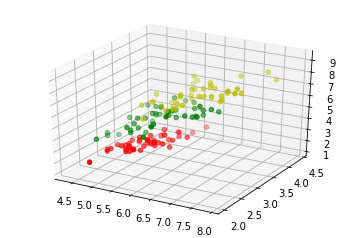

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [42]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


To determine the similarity between two instances, we need a distance function. In our example, the Euclidean distance is ideal:

In [43]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

In [44]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

We will test the function with our iris samples:

In [45]:
for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)

0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.26457513110645864, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.31622776601683755, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.31622776601683755, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]


__Voting to get a Single Result__

We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

In [46]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

We will test 'vote' on our training samples:

In [47]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


We can see that the predictions correspond to the labelled results, except in case of the item with the index 8.

'vote_prob' is a function like 'vote' but returns the class name and the probability for this class:

In [48]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [49]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


# Excercise Part

## Define given data as array

In [70]:
excercise_example = [4.8,2.5,5.3,2.4]

## Get Neighbours

In [71]:
excercise_neighbors = get_neighbors(learnset_data, learnset_labels, excercise_example, 5, distance = distance)
excercise_neighbors


[(array([5.7, 2.5, 5. , 2. ]), 1.0295630140987002, 2),
 (array([5.8, 2.8, 5.1, 2.4]), 1.0630145812734648, 2),
 (array([5.8, 2.7, 5.1, 1.9]), 1.1532562594670797, 2),
 (array([5.8, 2.7, 5.1, 1.9]), 1.1532562594670797, 2),
 (array([5.4, 3. , 4.5, 1.5]), 1.4352700094407325, 1)]

## Vote

In [66]:
vote(excercise_neighbors)

2

## Vote incl. probability

In [67]:
vote_prob(excercise_neighbors)

(2, 0.8)

## Results

According to the dataset definition the label classes are:
- 0 = Iris-setosa
- 1 = Iris-versicolor
- 2 = Iris-virginica

Therefore the given data of 4.8,2.5,5.3,2.4 are taken from an Iris-Virginica with a probability of 80% using a k value of 5.